# Lead Scoring Case Study

**Submitted by,**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Sindhu L**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Shreevatsa Hegde**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Shilpa Kamath**

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

## Step 1: Importing Essential Libraries

In [1]:
# importing required libraries and filtering warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## STEP 2: Importing file and understanding data

In [2]:
# importing the required file
df1=pd.read_csv("D:\Documents\DataScience\MachineLearning\Logistic Regression\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [3]:
# verifying the file has been loaded properly; viewing first 5 records of dataframe
df1.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
#viewing the last 5 records
df1.tail()

Prospect ID  Lead Number  \
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
9235                    01.High                        15.0   
9236                    01.High                        14.0   
9237                    01.High                        13.0   
9238                  02.Medium                        15.0   
9239                    01.High                        15.0   

     Asymmetrique Profile Score I agree to pay the amount through cheque  \
9235                       17.0                                       No   
9236                       19.0                                       No   
9237                       20.0                                       No   
9238                       16.0                                       No   
9239                       18.0                                       No   

     A free copy of Mastering The Interview Last Notable Activity  
9235                                     No     Email Marked Spam  
9236                                    Yes              SMS Sent  
9237                                    Yes              SMS Sent  
9238                                     No              SMS Sent  
9239                                    Yes              Modified  

[5 rows x 37 columns]

In [5]:
# viewing the shape
df1.shape

(9240, 37)

In [6]:
# to understand the data statistically
df1.describe().transpose()

count           mean           std       min  \
Lead Number                  9240.0  617188.435606  23405.995698  579533.0   
Converted                    9240.0       0.385390      0.486714       0.0   
TotalVisits                  9103.0       3.445238      4.854853       0.0   
Total Time Spent on Website  9240.0     487.698268    548.021466       0.0   
Page Views Per Visit         9103.0       2.362820      2.161418       0.0   
Asymmetrique Activity Score  5022.0      14.306252      1.386694       7.0   
Asymmetrique Profile Score   5022.0      16.344883      1.811395      11.0   

                                  25%       50%        75%       max  
Lead Number                  596484.5  615479.0  637387.25  660737.0  
Converted                         0.0       0.0       1.00       1.0  
TotalVisits                       1.0       3.0       5.00     251.0  
Total Time Spent on Website      12.0     248.0     936.00    2272.0  
Page Views Per Visit              1.0       2.0       3.00      55.0  
Asymmetrique Activity Score      14.0      14.0      15.00      18.0  
Asymmetrique Profile Score       15.0      16.0      18.00      20.0

<span style="color:green">**OBSERVATION**</style>
* Can see so much difference between 75th percentile and max values in few columns like **"TotalVisits","Total Time Spent on Website", "Page Views Per Visit"**; These columns seems to have outliers; Let us investigate on this in detail later 

In [7]:
# to view the datatype of column and presence of null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<span style="color:green">**OBSERVATION**</style>
* Many columns seems to have null values; Lets look at it in detail below

### STEP 3: Data Pre-Processing

In [8]:
#check for null values
round(100*df1.isnull().mean().sort_values(ascending=False),2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

##### Dropping out the columns with null values with more than 30 percentage
When column has more null values, its contribution to analysis is significantly low or it can lead to faulty conclusion; so dropping out them

In [9]:
columns_to_drop=list(df1.columns[(100*df1.isnull().mean())>30])
columns_to_drop

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [10]:
df1=df1.drop(columns_to_drop,axis=1)

##### Shape of dataframe after removing columns with higher percentage of null values

In [11]:
df1.shape

(9240, 31)

#### Data standardization

##### Dropping out column with unique values in all rows

In [12]:
#Fetching columns with unique values in all rows and we can drop them as they do not need for this analysis
unique_columns=df1.columns[df1.nunique()==df1.shape[0]]
print(unique_columns)
df1=df1.drop(unique_columns,axis=1)

Index(['Prospect ID', 'Lead Number'], dtype='object')


In [13]:
#Will Look into the values inside each columns and their frequency
for col in df1.columns:
    print(df1[col].value_counts(dropna=False))
    print("\n")
    print("---------------------------------")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


---------------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64


---------------------------------
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64


---------------------------------
Do Not Call
No     92

##### Handling data misspelling

In [14]:
# In "Lead Source" Column the category "Google" is present as "google" and "Google"; So combining them
df1["Lead Source"]=df1["Lead Source"].replace("google","Google")

In [15]:
#Checking "Lead Source" after changes
df1["Lead Source"].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

<span style="color:green">**OBSERVATION**</style>
* We could see in some categorical columns ("Country","Lead Source","Last Notable Activity") there are very few values in each category; we can group those categories into some relevant groups

##### Grouping categorical values with lower frequency under one category

In [16]:
# In Column Country modifying the null value with mode value ; Then grouping all the foreign countries as Others
df1["Country"].fillna(df1["Country"].mode()[0],inplace=True)
df1.loc[df1.Country!="India","Country"]="Other_Country"

In [17]:
df1.Country.value_counts(dropna=False)

Country
India            8953
Other_Country     287
Name: count, dtype: int64

In [18]:
df1['Lead Source'] = df1['Lead Source'].replace(["Press_Release","Click2call","Social Media","bing",
                                                "Live Chat","youtubechannel","testone","Pay per Click Ads",
                                                "welearnblog_Home","WeLearn","blog","NC_EDM"],'Other_Source')



In [19]:
df1['Last Notable Activity'] = df1['Last Notable Activity'].replace(["Email Marked Spam","Approached upfront",
                                                                    "Resubscribed to emails","View in browser link Clicked",
                                                                    "Form Submitted on Website","Email Received"],'Other_Notable_Activity')

##### Handling "Select" case in dataset

In [20]:
#Filtering out columns with "Select" category in it
columns_with_Select = [col for col in df1.columns if "Select" in df1[col].values]
columns_with_Select

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [21]:
# Column "How did you hear about X Education","City","Lead Profile","Specialization" has a category called Select in it which is inappropriate;
# Because Select and NAN appears to be in first two highest number of categories; These are columns with high null values; So we can drop it
for x in columns_with_Select:
    df1[x].replace("Select",np.nan,inplace=True)

In [22]:
#Checking the values after removing Select category in columns
for col in df1.columns:
    print(df1[col].value_counts(dropna=False))
    print("\n")  
    print("---------------------------------")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


---------------------------------
Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
NaN                   36
Other_Source          23
Name: count, dtype: int64


---------------------------------
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64


---------------------------------
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64


---------------------------------
Converted
0    5679
1    3561
Name: count, dtype: int64


---------------------------------
TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
N

In [23]:
#Checking for null values after replcing select with null
100*df1.isnull().mean().sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
Digital Advertisement                             0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [24]:
#Removing columns with high null values 
columns_to_drop=list(df1.columns[(100*df1.isnull().mean())>30])
print(columns_to_drop)
df1.drop(columns_to_drop,inplace=True,axis=1)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


##### Removing categorical columns with one unique value

In [25]:
#Looking for number of unique values in columns
df1.nunique()

Lead Origin                                         5
Lead Source                                         9
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                             2
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [26]:
# Columns with only one unique values can be removed; As that is not going to help our analysis
cols_with_one_unique=  df1.columns[df1.nunique()==1]
cols_with_one_unique

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

In [27]:
df1=df1.drop(cols_with_one_unique,axis=1)

In [28]:
df1.shape

(9240, 20)

##### Handling Data imbalance
* There are data imbalance seen in few columns such as "Newspaper Article","What matters most to you in choosing a course",
* "Through Recommendations","Digital Advertisement","Newspaper","X Education Forums","Search","Do Not Call"; Here onle one category has almost all values and looks biased; So dropping them

In [29]:
col_data_imbalance=["Newspaper Article","What matters most to you in choosing a course",
"Through Recommendations","Digital Advertisement","Newspaper","X Education Forums","Search","Do Not Call"]

In [30]:
for x in col_data_imbalance:
    print(df1[x].value_counts(ascending=False))
    print("---------------------------------")

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64
---------------------------------
What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64
---------------------------------
Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64
---------------------------------
Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64
---------------------------------
Newspaper
No     9239
Yes       1
Name: count, dtype: int64
---------------------------------
X Education Forums
No     9239
Yes       1
Name: count, dtype: int64
---------------------------------
Search
No     9226
Yes      14
Name: count, dtype: int64
---------------------------------
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
---------------------------------


In [31]:
# Dropping columns with data imbalance
df1.drop(col_data_imbalance,inplace=True,axis=1)

In [32]:
df1.shape

(9240, 12)

#### Data imputation

* columns **"What is your current occupation","Country ","TotalVisits","Page Views Per Visit","Last Activity" ,"Lead Source"** has null values in it; Now we will analyze and decide the approach to handle these null values
 

In [33]:
cat_cols_impute=["What is your current occupation","Country",
                "Last Activity","Lead Source"]
num_cols_impute=["TotalVisits","Page Views Per Visit"]

* Imputing the null values in categorical columns with mode value
* Imputing the null values in numerical columns with median value

In [34]:
# categorical column imputaion
for x in cat_cols_impute:
    df1[x].fillna(df1[x].mode()[0],inplace=True)

In [35]:
# numerical column imputation
for x in num_cols_impute:
    df1[x].fillna(df1[x].median(),inplace=True)

In [36]:
# Checking for null values after data cleaning steps
100*df1.isnull().mean().sort_values(ascending=False)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

##### Binary level Categorical Column Encoding

In [37]:
df1['Do Not Email'] = df1['Do Not Email'].map({'No': 0, 'Yes': 1})
df1['A free copy of Mastering The Interview'] = df1['A free copy of Mastering The Interview'].map({'No': 0, 'Yes': 1})

### STEP 4: Exploratory Data Analysis

#### Univariate Analysis

In [38]:
df1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
#Segmenting columns
num_cols=['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']
cat_cols=['Lead Origin', 'Lead Source', 'Do Not Email','Converted', 'Last Activity', 'Country','What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [40]:
#Outlier Analysis 
sns.color_palette("Paired")
plt.figure(figsize=(15,8))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x=df1[i[1]],palette=['green'])
    plt.title(i[1])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="color:green">**OBSERVATION**</style>
* "TotalVisits" and "Page Views Per Visit" has outliers and they are extreme
* For handling outliers, the values are going to be treated by capping and flooring method; where outliers whose value lies above the certain range(can be upper_bound,any percentile range) will be replaced by upper bound values;Similarly where outliers whose value lies below certain range will be replaced by lower bound values;

In [41]:
# viewing 99 percentile and max values
for col in num_cols:
    print(col)
    print(df1[col].quantile([0.99,1]))
    print("\n")

TotalVisits
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64


Total Time Spent on Website
0.99    1840.61
1.00    2272.00
Name: Total Time Spent on Website, dtype: float64


Page Views Per Visit
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64




* In Order to reduce the imputation in data, we will be replacing the outliers which is present outside 99 percentile is capped with 99th percentile value; As those are the extreme outliers  

In [42]:
#Capping outlier values above 99 percentile values with 99th percentile value
df1.loc[df1["TotalVisits"]>df1["TotalVisits"].quantile(0.99),"TotalVisits"]=df1["TotalVisits"].quantile(0.99)
df1.loc[df1["Page Views Per Visit"]>df1["Page Views Per Visit"].quantile(0.99),"Page Views Per Visit"]=df1["Page Views Per Visit"].quantile(0.99)

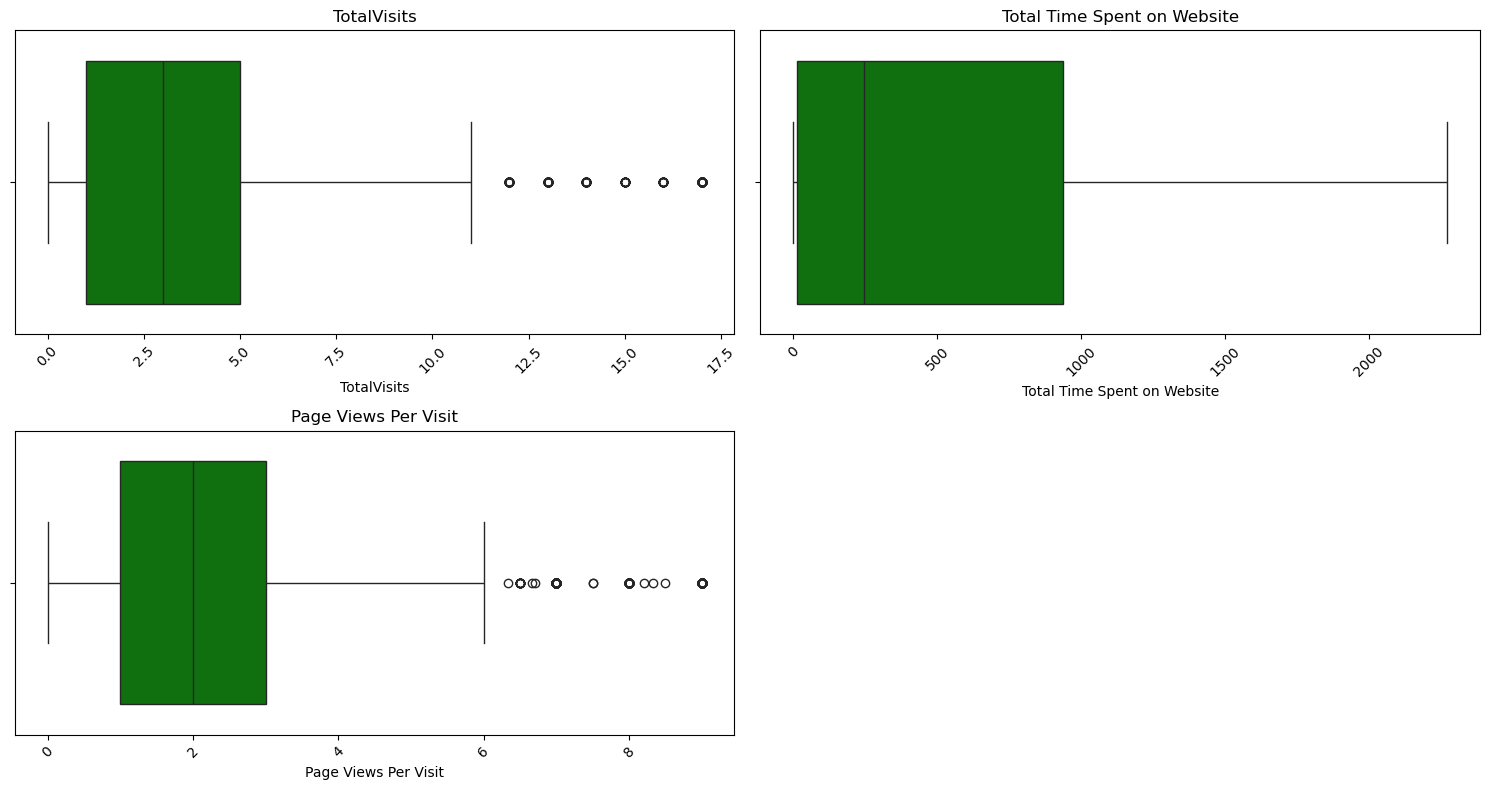

In [43]:
#Viewing numerical data after handling outliers
sns.color_palette("Paired")
plt.figure(figsize=(15,8))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x=df1[i[1]],palette=['green'])
    plt.title(i[1])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="color:green">**OBSERVATION**</style>
* The above plots shows extreme outliers has been handled; Still few outiers are seen ; But they are in acceptable range

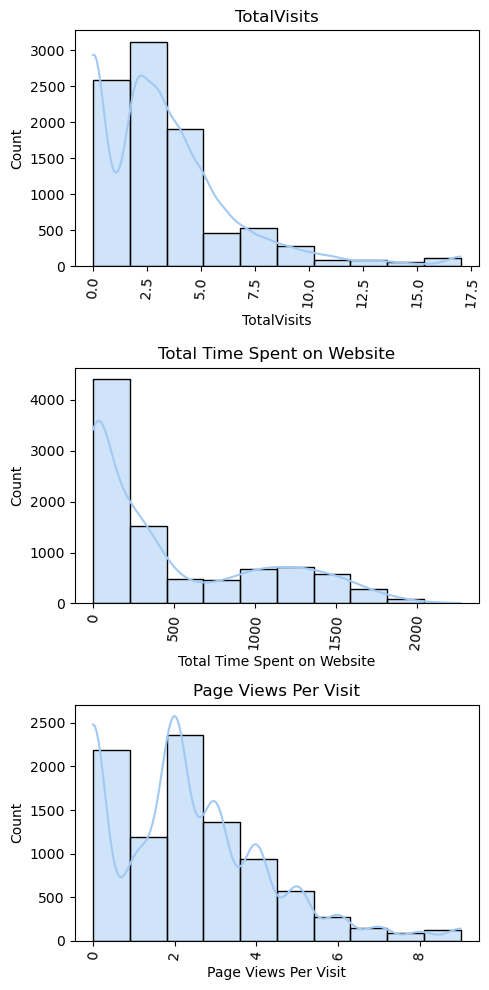

In [44]:
#To view the Distribution of numerical data
plt.figure(figsize=(5,10))
sns.set_palette("pastel")
for i in enumerate(num_cols):
    plt.subplot(3,1,i[0]+1)
    ax=sns.histplot(data=df1,x=i[1],bins=10,kde=True)
    plt.title(i[1])
    plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

### Target Variable Analysis

In [45]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title("Target Variable analysis \n (in terms of absolute value)")
ax=sns.countplot(x=df1["Converted"],palette=['r','g'])
plt.xticks(rotation=90)
for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.legend(labels=["not-converted","converted"])
plt.subplot(1,2,2)
plt.title("Target Variable analysis \n(in terms of percentage value)")
ax=sns.countplot(x=df1["Converted"],stat="percent",palette=['r','g'])
plt.xticks(rotation=90)
for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.legend(labels=["not-converted","converted"])
plt.tight_layout()
plt.show()

In [46]:
# Data imbalace ratio
df1[df1.Converted==0].shape[0]/df1[df1.Converted==1].shape[0]

1.594776748104465

<span style="color:green">**OBSERVATION**</style>
* Conversion Rate is 38.54%
* Data Imbalance Ratio is 1.59:1 , which indicates 1 in 2 person is getting converted

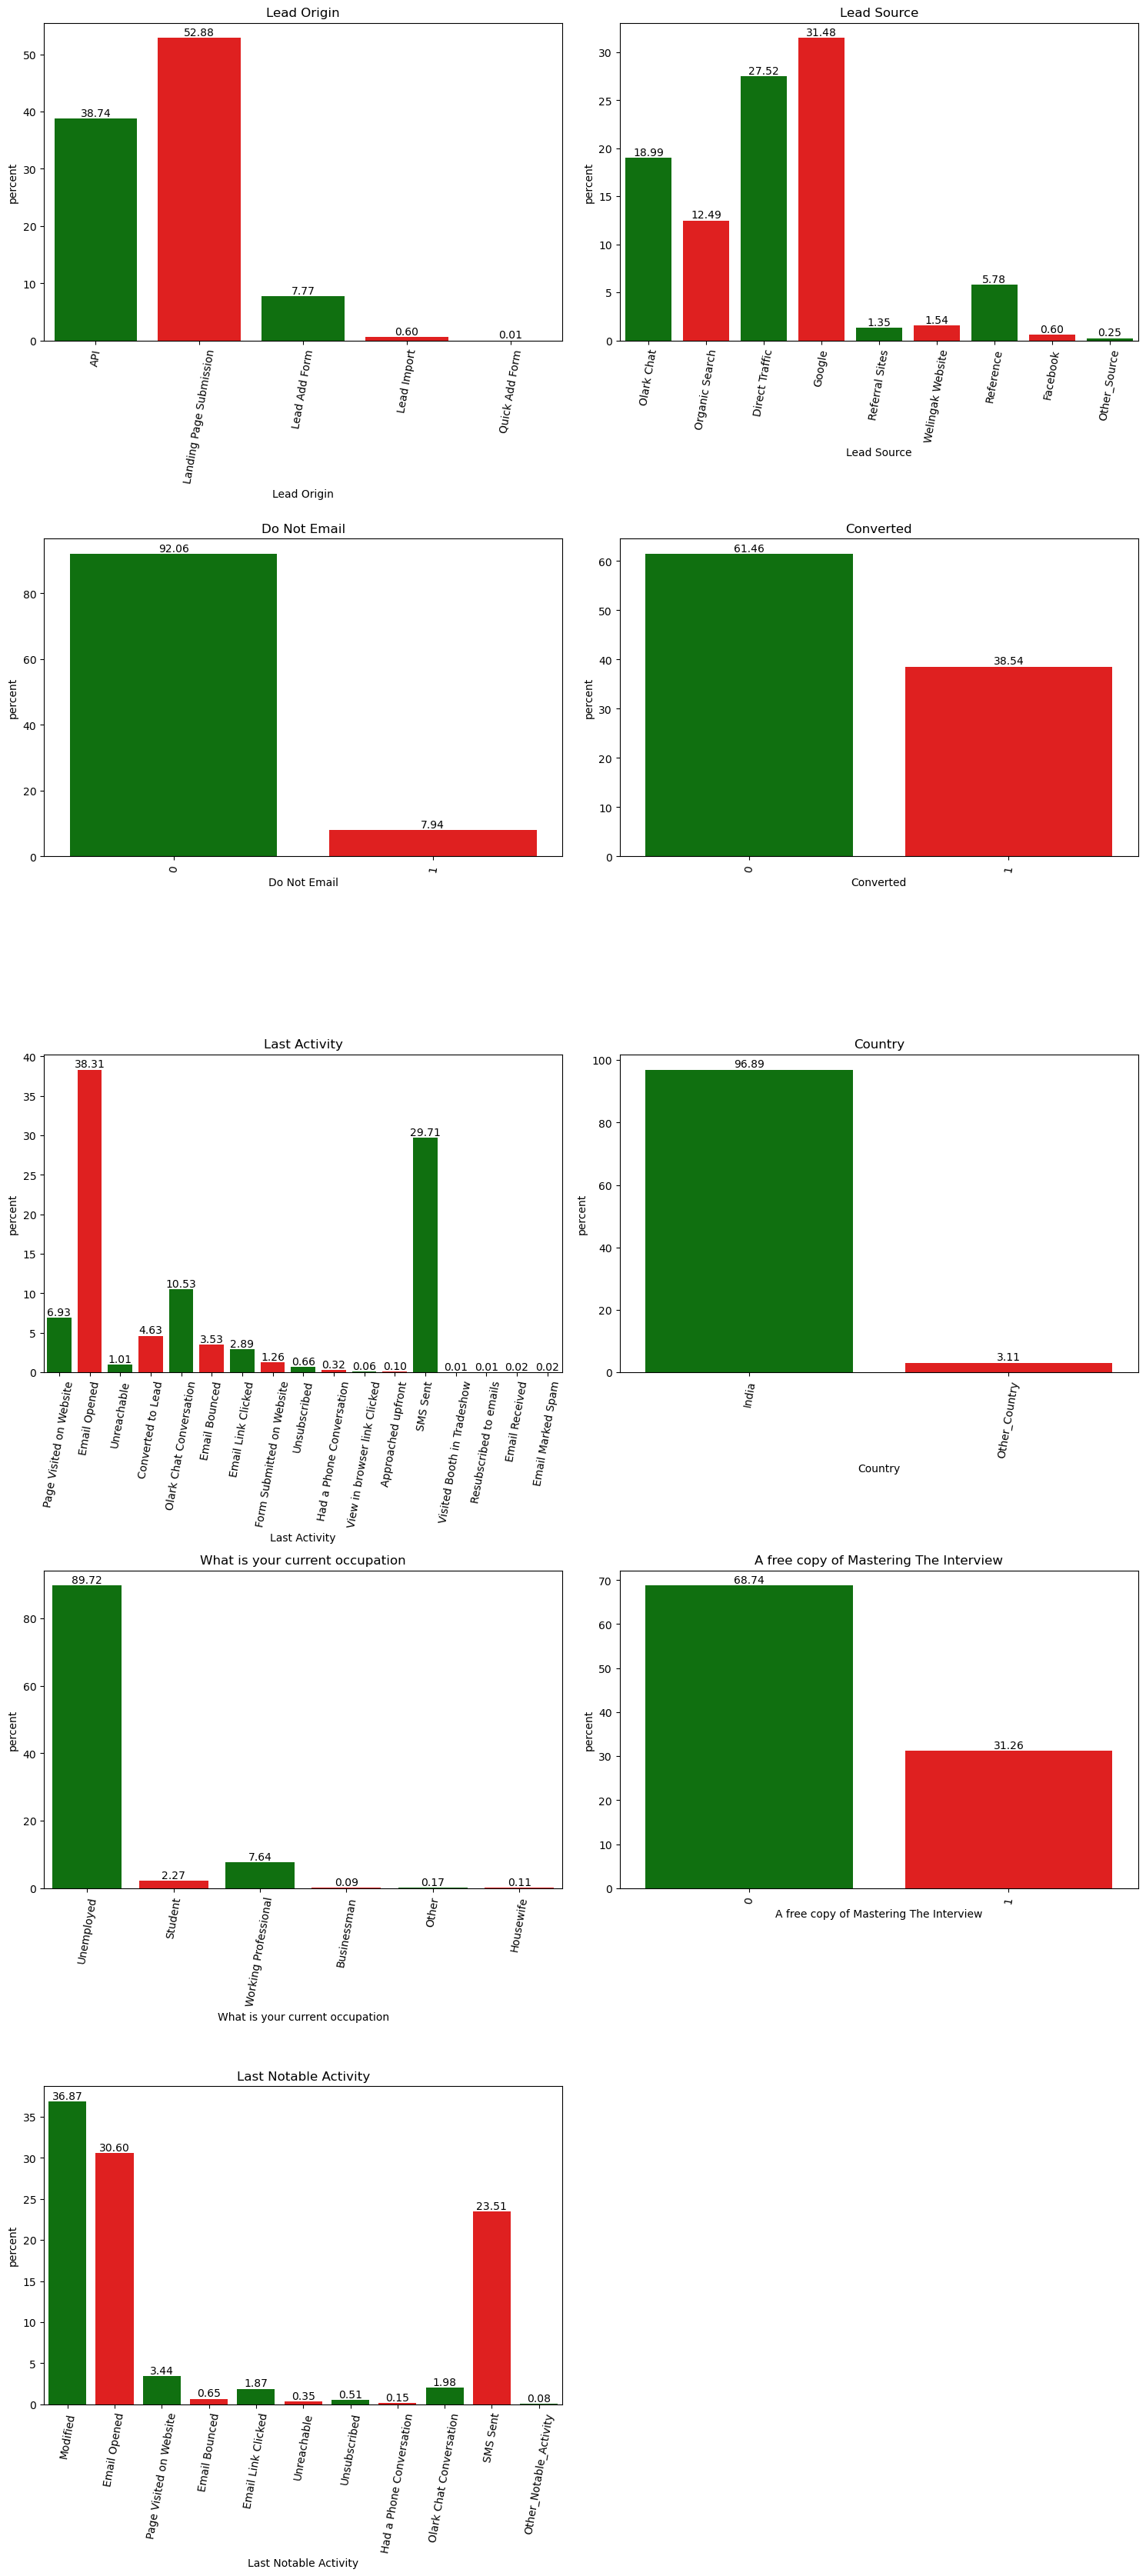

In [47]:
#Univariate Analysis for categorical columns
plt.figure(figsize=(15,65))
sns.set_palette("pastel")
for i in enumerate(cat_cols):
    plt.subplot(10,2,i[0]+1)
    ax=sns.countplot(x=df1[i[1]],stat="percent",palette=['g','r'])
    plt.title(i[1])
    plt.xticks(rotation=80)
    for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.show()

<span style="color:green">**OBSERVATION**</style>
* **Lead Origin** - Most of the customers who have been identified as lead is from people who have arrived on Landing Page submission (~ 53%); Next Source is mainly from API's (~39%)
* **Lead Source** - Source of the lead is from Google (31%)
* **Do Not Email** - Most of the Customers (92%) did not like to mail them about course
* **Converted** - 38.5% Leads have been converted 
* **Last Activity** - Most of the customer have opened email(38%) and have been sent a SMS(~30%)
* **Country** - Most of the customers are from India (~97%)
* **What is your current occupation** - Most of the customers are Unemployed(~90%)
* **A free copy of Mastering The Interview** - Approx 68% of customers have opted that they dont need a free copy
* **Last Notable Activity** - The Last Activity performed by student is Modified , Opened email


In [48]:
cat_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Country','What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
target_col=['Converted']

### Univariate Segmented Analysis

In [49]:
#Viewing the categorical columns in terms on target column ("Converted)
plt.figure(figsize=(15,25))
sns.set_palette("pastel")
for i in enumerate(cat_cols):
    plt.subplot(5,2,i[0]+1)
    ax=sns.countplot(data=df1,x=i[1],hue=target_col[0],stat="percent",palette=["r","g"])
    plt.title(i[1])
    plt.xticks(rotation=85)
    for container in ax.containers:
        ax.bar_label(container,fmt='%.2f')
plt.tight_layout()
plt.show()

<span style="color:green">**OBSERVATION**</style>
* **Last Notable Activity** -<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; SMS-Sent 69% of people to whom SMS has been sent has been converted ;This could be a potential indicator in our analysis <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Email Opened- 63% of people who opened mail have been converted ;This could be a potential indicator in our analysis
* **A free copy of Mastering Interview**- <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This is not a good incator as in both cases the percentage of persons converted are mostly equal; Converted percentage: yes- 36%; No- 39%
* **What is your current occupation**-<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Working professional: Among this category 91% of them got converted; This could be a good indicator for analysis </br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Unemployed: Among this category 34% of them got converted<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Student: Among this category 37% of them got converted<br/>
* **Last Activity** -<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; SMS Sent: Among this category 63% of them got converted; This could be a good indicator for analysis<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Email Opened :Among this category 37% of them got converted <br/>
* **Lead Origin** - <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Lead Add Form : Among this category 92% of them got converted; This could be a good indicator for analysis<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Landing Page Submission : Among this category 36% of them got converted<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; API : Among this category 31% of them got converted<br/>
* **Lead Source** - <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Wellingak website : Among this category 98% of them got converted; But it's overall contribution is low <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Reference : Among this category 92% of them got converted; This could be a good indicator for analysis<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Google : Among this category 40% of them got converted;<br/>
* **Country** - <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Among Indian customer 39% of them got converted; Among Other countries only 29% of them got converted
* **Do Not Email** - </br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Among the people who did not opted for mail 40% of them got converted;Among the people who opted for mail 16% of them got converted 



### Bivariate Analysis

In [50]:
#Numerical Columns vs Converted Column
plt.figure(figsize=(10,10))
sns.set_palette("pastel")
for i in enumerate(num_cols):
    if i != "Converted":
        plt.subplot(2,2,i[0]+1)
        ax=sns.boxplot(data=df1,x=target_col[0],y=i[1],palette=['r','g'])
        plt.title(i[1])
        plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

<span style="color:green">**OBSERVATION**</style>
* **Total Visits** - Could say, overall more number of visits to website have made conversions better comparitively; Because upper bound values are larger in converetd case; But cannot clearly distinguish
* **Total Time Spent on Website** - People who spent more time have converted in large number compared to people with lesser number of time spent on website; This variable could be a **potential indicator** for our analysis
* **Page Views Per Visit** - Could say, overall pepole who have viewed more number of pages in website have made conversions better comparitively; Because upper bound values are larger in converetd case; But cannot clearly distinguish

### Multivariate analysis

In [51]:
# To studu relationship between numerical column
sns.pairplot(data=df1,vars=num_cols,hue="Converted")

<span style="color:green">**OBSERVATION**</style>
* TotalVisits and Page Views Per Visit have positive correlation 

In [52]:
num_cols1=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Converted']

In [53]:
#Correlation table
df1[num_cols1].corr()

TotalVisits  Total Time Spent on Website  \
TotalVisits                     1.000000                     0.324556   
Total Time Spent on Website     0.324556                     1.000000   
Page Views Per Visit            0.706203                     0.336715   
Converted                       0.043716                     0.362483   

                             Page Views Per Visit  Converted  
TotalVisits                              0.706203   0.043716  
Total Time Spent on Website              0.336715   0.362483  
Page Views Per Visit                     1.000000  -0.004603  
Converted                               -0.004603   1.000000

In [54]:
#heatmap for numerical columns
plt.figure(figsize=(10,10))
sns.heatmap(df1[num_cols1].corr(),annot=True, cmap='Greens')
plt.show()

<span style="color:green">**OBSERVATION**</style><br/>
* **Total Time Spent on Website** have positive relationship with target variable and its fairly good realtionship (value=0.36); This could be a good indicator for our analysis

### STEP 5 : Data Preparation for Logistic Regression

#### Encoding

In [55]:
# Encoding using Dummy Variable Creation
df1=pd.get_dummies(data=df1,columns=["Lead Origin","Lead Source","Last Activity","Country",
                                     "What is your current occupation",
                                    "Last Notable Activity"],drop_first=True,dtype=int)

In [56]:
df1.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           0  ...   
3                        0                           0  ...   
4                        0                           0  ...   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Other_Notable_Activity  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4       

In [57]:
df1.shape

(9240, 50)

In [58]:
# To understand the multicollinearity between variables
df1.corr()

Do Not Email  Converted  \
Do Not Email                                            1.000000  -0.135580   
Converted                                              -0.135580   1.000000   
TotalVisits                                             0.008974   0.043716   
Total Time Spent on Website                            -0.046374   0.362483   
Page Views Per Visit                                    0.023875  -0.004603   
A free copy of Mastering The Interview                  0.055762  -0.039820   
Lead Origin_Landing Page Submission                     0.095304  -0.051236   
Lead Origin_Lead Add Form                              -0.020983   0.321702   
Lead Origin_Lead Import                                -0.017529  -0.023695   
Lead Origin_Quick Add Form                              0.035416   0.013138   
Lead Source_Facebook                                   -0.017529  -0.023695   
Lead Source_Google                                     -0.062113   0.026286   
Lead Source_Olark Chat                                 -0.051436  -0.129459   
Lead Source_Organic Search                              0.034295  -0.005879   
Lead Source_Other_Source                                0.009421   0.000607   
Lead Source_Reference                                  -0.038451   0.270830   
Lead Source_Referral Sites                             -0.010149  -0.033058   
Lead Source_Welingak Website                           -0.000911   0.154153   
Last Activity_Converted to Lead                        -0.062835  -0.117383   
Last Activity_Email Bounced                             0.618470  -0.120095   
Last Activity_Email Link Clicked                       -0.043505  -0.039690   
Last Activity_Email Marked Spam                         0.050089   0.018581   
Last Activity_Email Opened                             -0.224090  -0.013850   
Last Activity_Email Received                           -0.004322   0.018581   
Last Activity_Form Submitted on Website                -0.018744  -0.033364   
Last Activity_Had a Phone Conversation                 -0.009730   0.040803   
Last Activity_Olark Chat Conversation                  -0.055143  -0.210809   
Last Activity_Page Visited on Website                   0.082217  -0.083771   
Last Activity_Resubscribed to emails                   -0.003056   0.013138   
Last Activity_SMS Sent                                 -0.017564   0.325600   
Last Activity_Unreachable                               0.006465  -0.010785   
Last Activity_Unsubscribed                              0.262686  -0.020618   
Last Activity_View in browser link Clicked             -0.007488  -0.011456   
Last Activity_Visited Booth in Tradeshow               -0.003056  -0.008238   
Country_Other_Country                                   0.053524  -0.034105   
What is your current occupation_Housewife              -0.009669   0.041567   
What is your current occupation_Other                  -0.002609   0.020505   
What is your current occupation_Student                 0.006225  -0.004375   
What is your current occupation_Unemployed              0.042780  -0.281065   
What is your current occupation_Working Profess...     -0.049841   0.313837   
Last Notable Activity_Email Link Clicked               -0.037624  -0.035555   
Last Notable Activity_Email Opened                     -0.188089  -0.021955   
Last Notable Activity_Had a Phone Conversation         -0.011443   0.043476   
Last Notable Activity_Modified                          0.117259  -0.244294   
Last Notable Activity_Olark Chat Conversation          -0.013032  -0.072660   
Last Notable Activity_Other_Notable_Activity            0.021003   0.018607   
Last Notable Activity_Page Visited on Website           0.049921  -0.036051   
Last Notable Activity_SMS Sent                         -0.025990   0.351845   
Last Notable Activity_Unreachable                      -0.010505   0.036594   
Last Notable Activity_Unsubscribed                      0.243408  -0.012858   

                      

In [59]:
# To understand the multicollineartiy between variables
plt.figure(figsize = (25,25))
sns.heatmap(df1.corr(), annot = True, cmap="Greens")
plt.show()

<span style="color:green">**OBSERVATION**</style>
* There are multicollinearity issues in data; we will handle those issue in coming steps

### STEP 6 Model Building:


##### Train Test Split

In [60]:
# Putting predictor variables to X
X = df1.drop('Converted', axis=1)

# Putting Target variables to y
y = df1["Converted"]

In [61]:
# Splitting the data into train and test; Train data will be used for doing modelling and test data will be used to validate the model created
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 50)

In [62]:
X_train.shape

(6468, 49)

In [63]:
plt.figure(figsize = (25,25))
sns.heatmap(X_train.corr(), annot = True, cmap="Greens")
plt.show()

In [64]:
X_test.shape

(2772, 49)

#####  Feature Rescaling  

In [65]:
#rescale the variables so that they have a comparable scale ( for numerical columns) 
# Using MinMax Scaler here
scaler = MinMaxScaler() # instantiate an object
X_train[num_cols] = scaler.fit_transform(X_train[num_cols]) # rescaling is done in numerical columns 
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3241             0     0.235294                     0.428257   
5315             0     0.117647                     0.123239   
4039             0     0.000000                     0.000000   
7079             0     0.117647                     0.128961   
5655             0     0.058824                     0.218310   

      Page Views Per Visit  A free copy of Mastering The Interview  \
3241              0.147778                                       1   
5315              0.222222                                       0   
4039              0.000000                                       0   
7079              0.222222                                       1   
5655              0.111111                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3241                                    1                          0   
5315                                    1                          0   
4039                                    0                          0   
7079                                    1                          0   
5655                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
3241                        0                           0   
5315                        0                           0   
4039                        0                           0   
7079                        0                           0   
5655                        0                           0   

      Lead Source_Facebook  ...  Last Notable Activity_Email Link Clicked  \
3241                     0  ...                                         0   
5315                     0  ...                                         0   
4039                     0  ...                                         0   
7079                     0  ...                                         0   
5655                     0  ...                                         0   

      Last Notable Activity_Email Opened  \
3241                                   0   
5315                                   0   
4039                                   0   
7079                                   1   
5655                                   0   

      Last Notable Activity_Had a Phone Conversation  \
3241                                               0   
5315                                               0   
4039                                               0   
7079                                               0   
5655                                               0   

      Last Notable Activity_Modified  \
3241                               0   
5315                               0   
4039                               1   
7079                               0   
5655                               1   

      Last Notable Activity_Olark Chat Conversation  \
3241                                              0   
5315                                              0   
4039                                              0   
7079                                              0   
5655                                              0   

      Last Notable Activity_Other_Notable_Activity  \
3241                                             0   
5315                                             0   
4039                                             0   
7079                                             0   
5655                                             0   

      Last Notable Activity_Page Visited on Website  \
3241                                              0   
5315                                              0   
4039                                              0   
7079                                              0   
5655                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3241                            

##### Automated Feature Elimination using Recursive Feature Elimination (RFE)


In [66]:
#Using RFE
logreg = LogisticRegression() # instantiate an object
logreg.fit(X_train, y_train)
rfe = RFE(logreg, n_features_to_select=15)  # running RFE to select 15 features
rfe = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('A free copy of Mastering The Interview', False, 33),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Origin_Quick Add Form', False, 12),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Other_Source', False, 15),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 2),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 31),
 ('Last Activity_Email Marked Spam', False, 20),
 ('Last Activity_Email Opened', False, 14),
 ('Last Activity_Email Received', False, 35),
 ('Last Activity_Form Sub

In [68]:
# Selected columns
cols=X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [69]:
# Columns eliminated
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Other_Source', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow', 'Country_Other_Country',
       'What is yo

##### **Building Model using statsmodel**

**Model 1**

In [70]:
X_train_m1 = X_train[cols]
X_train_m1 = sm.add_constant(X_train_m1)
logreg= sm.GLM(y_train,X_train_m1, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.9
Date:                Sun, 16 Jun 2024   Deviance:                       5421.8
Time:                        11:49:32   Pearson chi2:                 7.30e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3924
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8192      0.082    -10.048      0.000      -0.979      -0.659
Do Not Email                                            -1.4365      0.189     -7.587      0.000      -1.808      -1.065
Total Time Spent on Website                              4.6808      0.165     28.436      0.000       4.358       5.003
Lead Origin_Lead Add Form                                3.7762      0.200     18.895      0.000       3.384       4.168
Lead Source_Olark Chat                                   1.2003      0.103     11.630      0.000       0.998       1.403
Lead Source_Welingak Website                             2.9803      1.028      2.898      0.004       0.965       4.996
Last Activity_Email Bounced                             -1.0894      0.352     -3.099      0.002      -1.779      -0.400
Last Activity_Olark Chat Conversation                   -1.1151      0.183     -6.082      0.000      -1.474      -0.756
What is your current occupation_Housewife               22.7919   1.55e+04      0.001      0.999   -3.03e+04    3.04e+04
What is your current occupation_Working Professional     2.8231      0.189     14.935      0.000       2.453       3.194
Last Notable Activity_Email Link Clicked                -1.9877      0.265     -7.487      0.000      -2.508      -1.467
Last Notable Activity_Email Opened                      -1.4177      0.088    -16.174      0.000      -1.589      -1.246
Last Notable Activity_Had a Phone Conversation           1.9609      1.099      1.785      0.074      -0.192       4.114
Last Notable Activity_Modified                          -1.8280      0.096    -19.137      0.000      -2.015      -1.641
Last Notable Activity_Olark Chat Conversation           -1.6742      0.354     -4.726      0.000      -2.368      -0.980
Last Notable Activity_Page Visited on Website           -1.7825      0.197     -9.063      0.000      -2.168      -1.397
========================================================================================================================
"""

In [71]:
# Make a VIF dataframe for all the variables present
X_train_m1 = X_train_m1.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_m1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

Features   VIF
6               Last Activity_Olark Chat Conversation  1.94
12                     Last Notable Activity_Modified  1.80
0                                        Do Not Email  1.76
5                         Last Activity_Email Bounced  1.74
1                         Total Time Spent on Website  1.56
3                              Lead Source_Olark Chat  1.55
2                           Lead Origin_Lead Add Form  1.45
13      Last Notable Activity_Olark Chat Conversation  1.35
10                 Last Notable Activity_Email Opened  1.34
4                        Lead Source_Welingak Website  1.30
8   What is your current occupation_Working Profes...  1.16
14      Last Notable Activity_Page Visited on Website  1.05
9            Last Notable Activity_Email Link Clicked  1.03
7           What is your current occupation_Housewife  1.01
11     Last Notable Activity_Had a Phone Conversation  1.00

<span style="color:green">**OBSERVATION**</style><br/>
* Eliminating the variable **"What is your current occupation_Housewife	"** whose p values are greater then 0.05 

**Model 2**

In [72]:
X_train_m2 = X_train_m1.drop(["What is your current occupation_Housewife"], axis = 1)
X_train_m2 = sm.add_constant(X_train_m2)
logreg= sm.GLM(y_train,X_train_m2, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2715.4
Date:                Sun, 16 Jun 2024   Deviance:                       5430.9
Time:                        11:49:32   Pearson chi2:                 7.33e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3915
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8176      0.081    -10.032      0.000      -0.977      -0.658
Do Not Email                                            -1.4378      0.189     -7.591      0.000      -1.809      -1.067
Total Time Spent on Website                              4.6765      0.164     28.435      0.000       4.354       4.999
Lead Origin_Lead Add Form                                3.7990      0.199     19.043      0.000       3.408       4.190
Lead Source_Olark Chat                                   1.1956      0.103     11.593      0.000       0.993       1.398
Lead Source_Welingak Website                             2.9537      1.028      2.872      0.004       0.938       4.969
Last Activity_Email Bounced                             -1.0894      0.352     -3.096      0.002      -1.779      -0.400
Last Activity_Olark Chat Conversation                   -1.1130      0.183     -6.072      0.000      -1.472      -0.754
What is your current occupation_Working Professional     2.8189      0.189     14.913      0.000       2.448       3.189
Last Notable Activity_Email Link Clicked                -1.9695      0.263     -7.487      0.000      -2.485      -1.454
Last Notable Activity_Email Opened                      -1.4112      0.088    -16.114      0.000      -1.583      -1.240
Last Notable Activity_Had a Phone Conversation           1.9600      1.099      1.784      0.074      -0.193       4.113
Last Notable Activity_Modified                          -1.8275      0.096    -19.134      0.000      -2.015      -1.640
Last Notable Activity_Olark Chat Conversation           -1.6738      0.354     -4.725      0.000      -2.368      -0.980
Last Notable Activity_Page Visited on Website           -1.7820      0.197     -9.061      0.000      -2.167      -1.397
========================================================================================================================
"""

In [73]:
# Make a VIF dataframe for all the variables present
X_train_m2 = X_train_m2.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_m2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

Features   VIF
6               Last Activity_Olark Chat Conversation  1.94
11                     Last Notable Activity_Modified  1.80
0                                        Do Not Email  1.76
5                         Last Activity_Email Bounced  1.74
1                         Total Time Spent on Website  1.56
3                              Lead Source_Olark Chat  1.55
2                           Lead Origin_Lead Add Form  1.44
12      Last Notable Activity_Olark Chat Conversation  1.35
9                  Last Notable Activity_Email Opened  1.34
4                        Lead Source_Welingak Website  1.29
7   What is your current occupation_Working Profes...  1.16
13      Last Notable Activity_Page Visited on Website  1.05
8            Last Notable Activity_Email Link Clicked  1.03
10     Last Notable Activity_Had a Phone Conversation  1.00

<span style="color:green">**OBSERVATION**</style><br/>
* Eliminating the variable **"Last Notable Activity_Had a Phone Conversation"** whose p values are greater than 0.05

**Model 3**

In [74]:
X_train_m3 = X_train_m2.drop(["Last Notable Activity_Had a Phone Conversation"], axis = 1)
X_train_m3 = sm.add_constant(X_train_m3)
logreg= sm.GLM(y_train,X_train_m3, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2717.7
Date:                Sun, 16 Jun 2024   Deviance:                       5435.4
Time:                        11:49:32   Pearson chi2:                 7.33e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3911
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8035      0.081     -9.897      0.000      -0.963      -0.644
Do Not Email                                            -1.4458      0.189     -7.633      0.000      -1.817      -1.075
Total Time Spent on Website                              4.6702      0.164     28.423      0.000       4.348       4.992
Lead Origin_Lead Add Form                                3.7950      0.200     19.021      0.000       3.404       4.186
Lead Source_Olark Chat                                   1.1898      0.103     11.544      0.000       0.988       1.392
Lead Source_Welingak Website                             2.9541      1.028      2.873      0.004       0.939       4.970
Last Activity_Email Bounced                             -1.0869      0.352     -3.089      0.002      -1.776      -0.397
Last Activity_Olark Chat Conversation                   -1.1113      0.183     -6.063      0.000      -1.471      -0.752
What is your current occupation_Working Professional     2.8161      0.189     14.896      0.000       2.446       3.187
Last Notable Activity_Email Link Clicked                -1.9799      0.263     -7.528      0.000      -2.495      -1.464
Last Notable Activity_Email Opened                      -1.4224      0.087    -16.268      0.000      -1.594      -1.251
Last Notable Activity_Modified                          -1.8385      0.095    -19.274      0.000      -2.025      -1.652
Last Notable Activity_Olark Chat Conversation           -1.6843      0.354     -4.756      0.000      -2.378      -0.990
Last Notable Activity_Page Visited on Website           -1.7927      0.197     -9.120      0.000      -2.178      -1.407
========================================================================================================================
"""

In [75]:
# Make a VIF dataframe for all the variables present
X_train_final = X_train_m3.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

Features   VIF
6               Last Activity_Olark Chat Conversation  1.94
10                     Last Notable Activity_Modified  1.80
0                                        Do Not Email  1.76
5                         Last Activity_Email Bounced  1.74
1                         Total Time Spent on Website  1.56
3                              Lead Source_Olark Chat  1.55
2                           Lead Origin_Lead Add Form  1.44
11      Last Notable Activity_Olark Chat Conversation  1.35
9                  Last Notable Activity_Email Opened  1.34
4                        Lead Source_Welingak Website  1.29
7   What is your current occupation_Working Profes...  1.16
12      Last Notable Activity_Page Visited on Website  1.05
8            Last Notable Activity_Email Link Clicked  1.03

<span style="color:green">**OBSERVATION**</style><br/>
* Both p-value and VIF value are low; Now model looks fine

### Step 7 Model Evaluation 

#### We will be evaluating models based on below metrics:
* Accuracy
* Sensitivity
* Specifivity
* false postive rate
* Negative predictive value
* Precision
* Recall

In [76]:
def evaluation_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    falsePositiveRate = FP/(FP + TN) 
    negativePredictiveValue= TN/(FN+TN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
 
    print ("True Negative              : ", TN)
    print ("True Positive              : ", TP)
    print ("False Negative             : ", FN)
    print ("False Positve              : ", FP) 
    print("\n") 
    print ("Accuracy                   : ", round(accuracy,2))
    print ("Sensitivity                : ", round(sensitivity,2))
    print ("Specificity                : ", round(specificity,2))
    print ("False Positive Rate        : ", round(falsePositiveRate,2))
    print ("Negative Predictive Value  : ", round(negativePredictiveValue,2))
    print ("Precision                  : ", round(precision,2))
    print ("Recall                     : ", round(recall,2))

In [77]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_m3)
y_train_pred[:10]

3241    0.767915
5315    0.443268
4039    0.189662
7079    0.164707
5655    0.164872
5397    0.192717
4499    0.189662
403     0.594001
2237    0.127352
8027    0.856752
dtype: float64

In [78]:
y_train_pred.shape

(6468,)

In [79]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.76791545, 0.44326785, 0.18966174, 0.16470654, 0.16487206,
       0.19271681, 0.18966174, 0.59400138, 0.12735179, 0.85675222])

##### Creating Dataframe with actual Converted values and predicted probabilities

In [80]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          1        0.767915         3241
1          1        0.443268         5315
2          0        0.189662         4039
3          0        0.164707         7079
4          1        0.164872         5655

#### Random cut-off point
* Starting with random cut off point 

In [81]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          1        0.767915         3241          1
1          1        0.443268         5315          0
2          0        0.189662         4039          0
3          0        0.164707         7079          0
4          1        0.164872         5655          0

In [82]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.812152133580705


In [83]:
confusion_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion_1

array([[3493,  460],
       [ 755, 1760]], dtype=int64)

In [84]:
evaluation_metrics(confusion_1)

True Negative              :  3493
True Positive              :  1760
False Negative             :  755
False Positve              :  460


Accuracy                   :  0.81
Sensitivity                :  0.7
Specificity                :  0.88
False Positive Rate        :  0.12
Negative Predictive Value  :  0.82
Precision                  :  0.79
Recall                     :  0.7


<span style="color:green">**OBSERVATION**</style><br/>
* As per our business goal we need to concentrate on Sensitivity and Recall; Because we need to identify the positive leads correctly; Even if the false positive leads are high , it is not going to affect much; Business will be affected by false negatives.
* With 0.5 cutoff sensitivity is 0.7 and Recall is 0.69; But our goal is to reach 0.8; Will find out optimal cutoff

#### Finding Optimal Cut-off point 
* This step is crucial because we need to balance sensitivity and specificity; We will be using ROC curve and plotting sensitivity, specificity, and accuracy for different probabilities

##### Plotting ROC curve

In [85]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [86]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

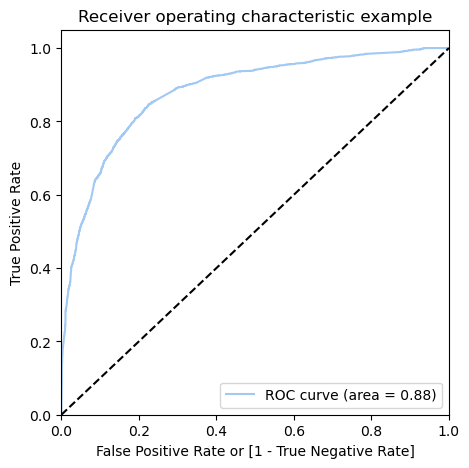

In [87]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

<span style="color:green">**OBSERVATION**</style><br/>
* Area covered under ROC curve comes around 0.88, which is good score; It indicates that the model is good in predicting values

In [88]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          1        0.767915         3241          1    1    1    1    1    1   
1          1        0.443268         5315          0    1    1    1    1    1   
2          0        0.189662         4039          0    1    1    0    0    0   
3          0        0.164707         7079          0    1    1    0    0    0   
4          1        0.164872         5655          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    1    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [89]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388837  1.000000  0.000000
0.1   0.1  0.584106  0.967793  0.339995
0.2   0.2  0.758349  0.901789  0.667088
0.3   0.3  0.801175  0.847714  0.771566
0.4   0.4  0.810142  0.775746  0.832026
0.5   0.5  0.812152  0.699801  0.883633
0.6   0.6  0.792672  0.584095  0.925373
0.7   0.7  0.779839  0.510934  0.950923
0.8   0.8  0.755102  0.416700  0.970402
0.9   0.9  0.715059  0.284692  0.988869


In [90]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

<span style="color:green">**OBSERVATION**</style><br/>
* The graph shows optimal cutoff at 0.35 approx

In [91]:
#Mapping done with 0.35 as threshold
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          1        0.767915         3241          1    1    1    1    1    1   
1          1        0.443268         5315          0    1    1    1    1    1   
2          0        0.189662         4039          0    1    1    0    0    0   
3          0        0.164707         7079          0    1    1    0    0    0   
4          1        0.164872         5655          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    0    0                1  
1    0    0    0    0    0                1  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

 <span style="color:blue;font-size:20px;">**Lead Scores on Train Data**</style><br/>

In [92]:
y_train_pred_final = y_train_pred_final[['Prospect ID','Converted','Converted_Prob','final_predicted']]
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         3241          1        0.767915                1          77
1         5315          1        0.443268                1          44
2         4039          0        0.189662                0          19
3         7079          0        0.164707                0          16
4         5655          1        0.164872                0          16

In [93]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8058132343846629

In [94]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_2

array([[3168,  785],
       [ 471, 2044]], dtype=int64)

In [95]:
evaluation_metrics(confusion_2)

True Negative              :  3168
True Positive              :  2044
False Negative             :  471
False Positve              :  785


Accuracy                   :  0.81
Sensitivity                :  0.81
Specificity                :  0.8
False Positive Rate        :  0.2
Negative Predictive Value  :  0.87
Precision                  :  0.72
Recall                     :  0.81


<span style="color:green">**OBSERVATION**</style><br/>
* As per our business goal we need to concentrate on Sensitivity and Recall; Because we need to identify the positive leads correctly; Even if the false positive leads are high , it is not going to affect much; Business will be affected by false negatives.
* With 0.35 cutoff sensitivity is 0.81 and Recall is 0.81; This cut-off looks fine for our case

#### Precision and recall tradeoff

In [96]:
# We can still experiment with cutoff value using Precision and recall tradeoff ; 
#will see could we able to improve our sensitivity and recall even more 

In [97]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

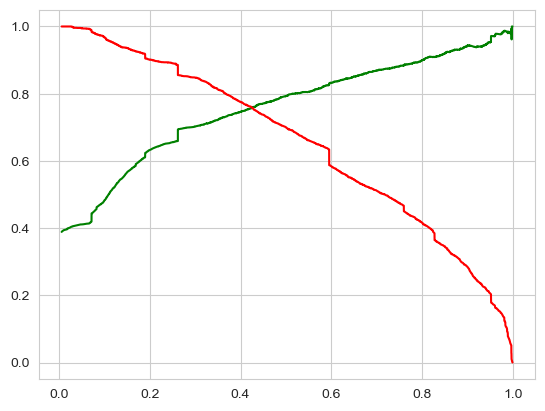

In [98]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [99]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         3241          1        0.767915                1          77
1         5315          1        0.443268                1          44
2         4039          0        0.189662                0          19
3         7079          0        0.164707                0          16
4         5655          1        0.164872                0          16

In [100]:
confusion_3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_3

array([[3310,  643],
       [ 584, 1931]], dtype=int64)

In [101]:
evaluation_metrics(confusion_3)

True Negative              :  3310
True Positive              :  1931
False Negative             :  584
False Positve              :  643


Accuracy                   :  0.81
Sensitivity                :  0.77
Specificity                :  0.84
False Positive Rate        :  0.16
Negative Predictive Value  :  0.85
Precision                  :  0.75
Recall                     :  0.77


<span style="color:green">**OBSERVATION**</style><br/>
* As per our business goal we need to concentrate on Sensitivity and Recall; Because we need to identify the positive leads correctly; Even if the false positive leads are high , it is not going to affect much; Business will be affected by false negatives.
* With 0.41 cutoff sensitivity is 0.77 and Recall is 0.77; But our goal is to reach 0.8
* So we can go with cutoff of 0.35 value (where sensitivity and recall is 0.81), where we could able to reach our goal 0.8 

### Step 8 Model Prediction on Test data 

#### Scaling test data

In [102]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Prediction on Test Data

In [103]:
#Adding columns of our final model to test dataset
X_test = X_test[X_train_final.columns]
X_test_sm = sm.add_constant(X_test) # adding constant
#Making predictions using our final model
y_test_pred = res.predict(X_test_sm)

In [104]:
y_test_pred[:10]

2018    0.858221
8181    0.952189
2032    0.123166
529     0.363141
3641    0.842583
2770    0.760061
8954    0.498008
1361    0.112285
7916    0.040646
6790    0.010784
dtype: float64

In [105]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [106]:
# Let's see the head
y_pred_1.head()

0
2018  0.858221
8181  0.952189
2032  0.123166
529   0.363141
3641  0.842583

In [107]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [108]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [109]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [110]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [111]:
y_pred_final.head()

Converted  Prospect ID         0
0          1         2018  0.858221
1          0         8181  0.952189
2          1         2032  0.123166
3          1          529  0.363141
4          1         3641  0.842583

In [112]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [113]:
#Using optimal cutoff as 0.35
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

 <span style="color:blue;font-size:20px;">**Lead Scores on Test Data**</style><br/>

In [114]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob','final_predicted']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         2018          1        0.858221                1          86
1         8181          0        0.952189                1          95
2         2032          1        0.123166                0          12
3          529          1        0.363141                1          36
4         3641          1        0.842583                1          84

<span style="color:green">**OBSERVATION**</style><br/>
* Higher the lead score , the customer is identified as "Hot Leads";who will have greater chance of conversion

In [115]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8055555555555556

In [116]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1389,  337],
       [ 202,  844]], dtype=int64)

In [117]:
evaluation_metrics(confusion_test)

True Negative              :  1389
True Positive              :  844
False Negative             :  202
False Positve              :  337


Accuracy                   :  0.81
Sensitivity                :  0.81
Specificity                :  0.8
False Positive Rate        :  0.2
Negative Predictive Value  :  0.87
Precision                  :  0.71
Recall                     :  0.81


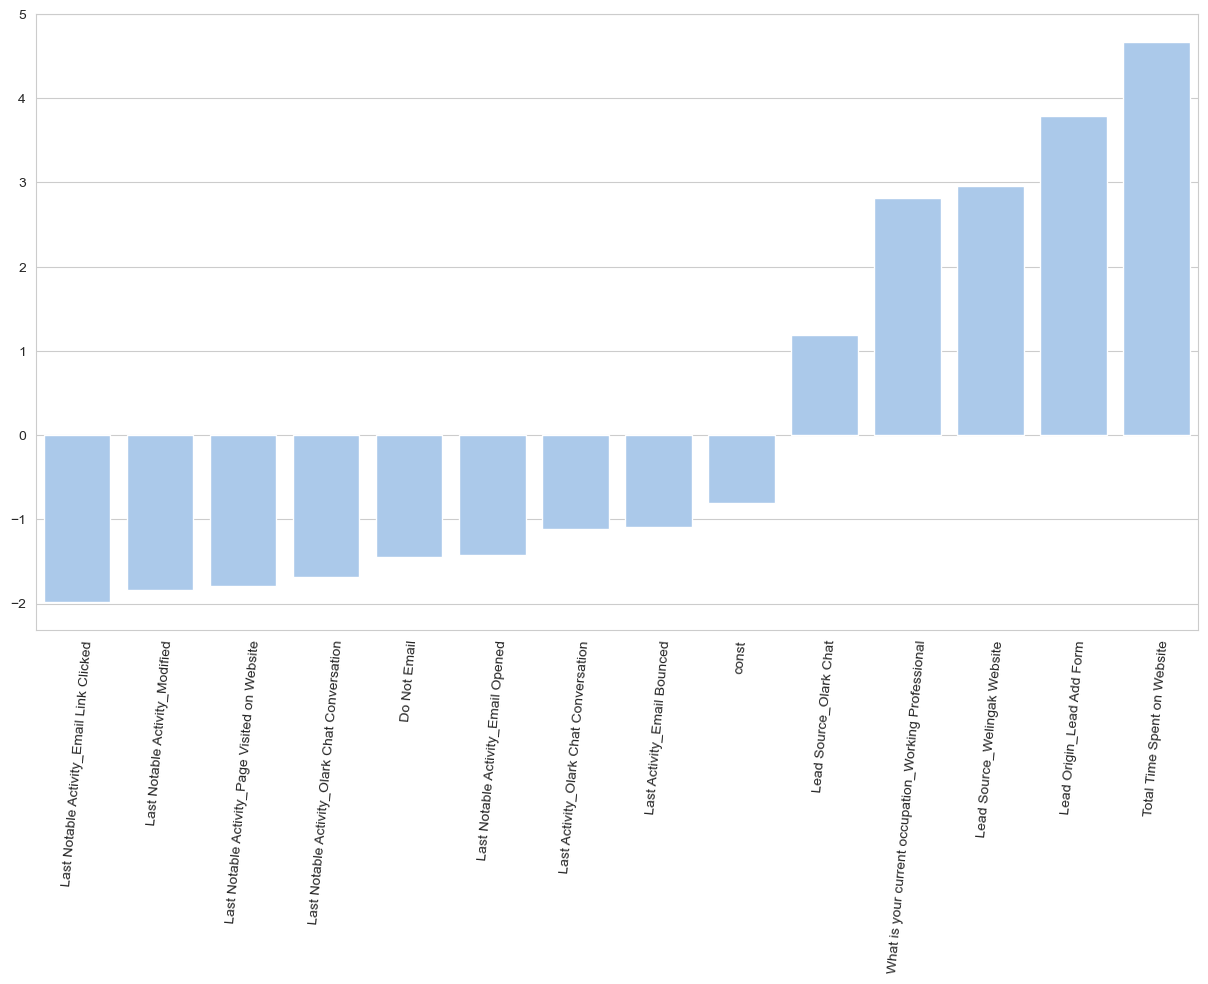

In [118]:
# Plotting the graph with coefficients to understand how much the variables are affecting target variable
plt.figure(figsize = (15, 8))
sns.barplot(x=res.params.values , y=res.params.values)
ticks = np.arange(0,14,1)
plt.xticks(ticks, labels = res.params.sort_values().index)
plt.xticks(rotation=85)
plt.show()

In [119]:
# viewing the coefficients of all variables
res.params.sort_values(ascending= False)

Total Time Spent on Website                             4.670183
Lead Origin_Lead Add Form                               3.794975
Lead Source_Welingak Website                            2.954069
What is your current occupation_Working Professional    2.816105
Lead Source_Olark Chat                                  1.189752
const                                                  -0.803461
Last Activity_Email Bounced                            -1.086858
Last Activity_Olark Chat Conversation                  -1.111280
Last Notable Activity_Email Opened                     -1.422430
Do Not Email                                           -1.445773
Last Notable Activity_Olark Chat Conversation          -1.684255
Last Notable Activity_Page Visited on Website          -1.792730
Last Notable Activity_Modified                         -1.838501
Last Notable Activity_Email Link Clicked               -1.979920
dtype: float64

<span style="color:green">**OBSERVATION**</style><br/>
* Higher the coefficients values irrespestive of signs they have , higher they influence the target variable
* Top Variables influencing the Conversion is "Total Time Spent on Website","Lead Origin_Lead Add Form","Lead Source_Welingak Website"

#### Summary
* We have chosen the optimal cutoff point as 0.35 from Sensitivity,specificity and accuracy plot
* Using optimal cutoff as 0.35 the evaluation metrics are as follows for training and test data set<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Training data set**<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Accuracy:0.81<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sensitivity:0.81<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Specificity:0.80<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall:0.81<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Test data set**<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Accuracy:0.81<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sensitivity:0.81<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Specificity:0.80<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall:0.81<br/>
* Top 3 Variables influencing the Conversion is "Total Time Spent on Website","Lead Origin_Lead Add Form","Lead Source_Welingak Website"
* Thus CEO's target sensitivity of 80% is achieved